In [1]:
import pandas as pd
import numpy as np
import re
import z2_save_jaspar, z1_save_oligos, z3_transformations
from scipy.stats import ks_2samp



In [2]:

#LOAD JASPAR & OLIGO DATA
jaspar = z2_save_jaspar.load_jaspar()
oligos,oligos_by_exp = z1_save_oligos.load_oligos_plus()
obe = oligos_by_exp



In [4]:
all_obe = oligos_by_exp.reset_index().loc[lambda x:x.mutant_num<5].groupby(["starts","mutant_num","exp_type"]).mu.mean()


In [104]:
len(filters)

916

In [105]:
len(all_obe)

48671

In [5]:

filters = z3_transformations.compute_filters(all_obe).dropna(subset=["allothersstd"])
quantiles = z3_transformations.compute_quantiles(filters)

/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

In [9]:
import seaborn as sns

### SEQUENCING DATA ###

In [13]:

dld_obe = obe.loc[lambda x: x.exp_type=="DLD1_WT"]

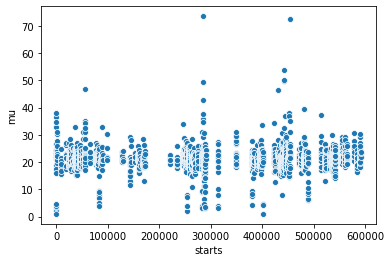

In [22]:
df = dld_obe.groupby("starts").sum()
sns.scatterplot(x="starts",y="mu", data = df.reset_index())

In [29]:
filters.ttest_pval

exp_type  mutant_start_position
DLD1_WT   300                      0.073664
          720                      0.049763
          1676                     0.430885
          1736                     0.302045
          1766                     0.009251
                                     ...   
U2OS_WT   584103                   0.860763
          590613                   0.386195
          590733                   0.046283
          591093                   0.394617
          591123                   0.318302
Name: ttest_pval, Length: 916, dtype: float64

In [36]:
min_pvals = filters[["ttest2_pval", "ttest_pval"]].min(axis=1)

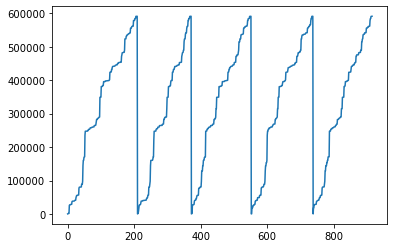

In [41]:
plt.plot(filters.reset_index()["mutant_start_position"])

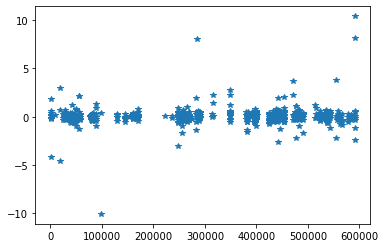

In [47]:
plt.plot(filters.groupby("mutant_start_position").mean().mutdiff, "*")

In [55]:
from pandas import IndexSlice as idx

In [99]:
zoom = filters.reset_index().loc[lambda x: (x.mutant_start_position < 4e5) & (x.mutant_start_position >3e5)]#.loc(axis=0)[:,3e5:4e5]

In [100]:
zoom.columns

Index(['exp_type', 'mutant_start_position', 'allothers', 'onlyablations',
       'allothers2', 'allothersstd', 'std', 'onlyablations2', 'othermutants',
       'onlywildtype', 'ks_pval', 'ks2_pval', 'ttest_pval', 'ttest2_pval',
       'ks_stat', 'mutdiff', 'wtdiff', 'othersdiff', 'rank_mutdiff', 'rank_ao',
       'rank_ao_dld1', 'rank_ao_u2os', 'rank_ao_hct116', 'filterchange',
       'ks_1or2', 'log_ks_pval'],
      dtype='object')

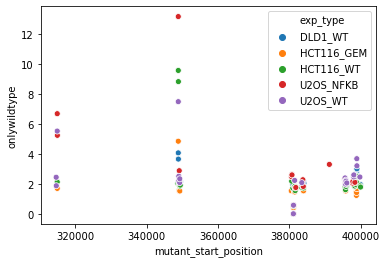

In [103]:
df = zoom

sns.scatterplot(x = "mutant_start_position",y="onlywildtype",hue="exp_type", data =df.reset_index())